<a href="https://colab.research.google.com/github/sivasan2022/Credit-card-fraud-detection/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [ ]:
df=pd.read_csv('fraudTrain.csv')

In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42826,42826,2019-01-26 15:08:27,3524574586339330,fraud_McKenzie-Huels,food_dining,28.37,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,b84678e05a1fe0423c27edd44c47a912,1.327591e+09,27.958330,-79.973208,0.0
42827,42827,2019-01-26 15:09:26,4364010865167176,fraud_Barton LLC,kids_pets,84.71,Gary,Martinez,M,03512 Jackson Ports,...,39.5483,-119.7957,276896.0,Immunologist,1997-03-12,0576985c3ab2858e0371085ab4dbb8f7,1.327591e+09,39.801946,-119.286741,0.0
42828,42828,2019-01-26 15:10:11,3576431665303017,fraud_Erdman-Durgan,health_fitness,134.53,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922.0,Contractor,1981-10-24,6e6fd83b78d11122c559036e9208b7e1,1.327591e+09,33.042530,-111.186488,0.0
42829,42829,2019-01-26 15:12:12,30238755902988,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,Danielle,Yu,F,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766.0,Press sub,1976-01-02,ab09218dab34d39e7ef174655b21a28c,1.327591e+09,31.461002,-96.868171,0.0


**DATA ANALYSIS**

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
42826,42826,2019-01-26 15:08:27,3524574586339330,fraud_McKenzie-Huels,food_dining,28.37,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,b84678e05a1fe0423c27edd44c47a912,1.327591e+09,27.958330,-79.973208,0.0
42827,42827,2019-01-26 15:09:26,4364010865167176,fraud_Barton LLC,kids_pets,84.71,Gary,Martinez,M,03512 Jackson Ports,...,39.5483,-119.7957,276896.0,Immunologist,1997-03-12,0576985c3ab2858e0371085ab4dbb8f7,1.327591e+09,39.801946,-119.286741,0.0
42828,42828,2019-01-26 15:10:11,3576431665303017,fraud_Erdman-Durgan,health_fitness,134.53,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,...,33.5623,-112.0559,1312922.0,Contractor,1981-10-24,6e6fd83b78d11122c559036e9208b7e1,1.327591e+09,33.042530,-111.186488,0.0
42829,42829,2019-01-26 15:12:12,30238755902988,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,Danielle,Yu,F,5395 Colon Burgs Suite 037,...,30.5920,-97.2893,1766.0,Press sub,1976-01-02,ab09218dab34d39e7ef174655b21a28c,1.327591e+09,31.461002,-96.868171,0.0
42830,42830,2019-01-26 15:12:38,180094608895855,fraud_Schaefer Ltd,kids_pets,18.35,Tammie,Harper,F,57887 Gutierrez Harbor,...,43.7575,-12.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.to_csv("updated_dataset.csv", index=False)

In [ ]:
nan_rows = df[df.isna().any(axis=1)]

# Optional: Print the rows containing NaN values
print("Rows containing NaN values:")
print(nan_rows)

# Remove rows containing NaN values
df.dropna(inplace=True)

# Save the updated DataFrame back to a new CSV file or use it for further analysis
df.to_csv("updated_dataset.csv", index= True)

Rows containing NaN values:
      trans_date_trans_time           cc_num            merchant   category  \
42830   2019-01-26 15:12:38  180094608895855  fraud_Schaefer Ltd  kids_pets   

         amt   first    last gender                  street     city  ...  \
42830  18.35  Tammie  Harper      F  57887 Gutierrez Harbor  Westfir  ...   

           lat  long  city_pop  job  dob trans_num unix_time merch_lat  \
42830  43.7575 -12.0       NaN  NaN  NaN       NaN       NaN       NaN   

       merch_long  is_fraud  
42830         NaN       NaN  

[1 rows x 22 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42830 entries, 0 to 42829
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  42830 non-null  object 
 1   cc_num                 42830 non-null  int64  
 2   merchant               42830 non-null  object 
 3   category               42830 non-null  object 
 4   amt                    42830 non-null  float64
 5   first                  42830 non-null  object 
 6   last                   42830 non-null  object 
 7   gender                 42830 non-null  object 
 8   street                 42830 non-null  object 
 9   city                   42830 non-null  object 
 10  state                  42830 non-null  object 
 11  zip                    42830 non-null  int64  
 12  lat                    42830 non-null  float64
 13  long                   42830 non-null  float64
 14  city_pop               42830 non-null  float64
 15  jo

In [ ]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.283000e+04,42830.000000,42830.000000,42830.000000,42830.000000,4.283000e+04,4.283000e+04,42830.000000,42830.000000,42830.000000
mean,4.178099e+17,71.564581,48732.810530,38.536103,-90.243213,8.852743e+04,1.326469e+09,38.536078,-90.247263,0.009269
std,1.310136e+18,151.063751,27017.075075,5.090997,13.948152,2.977794e+05,6.255365e+05,5.121287,13.962830,0.095831
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000
25%,1.800429e+14,9.690000,25832.000000,34.668900,-96.809400,7.430000e+02,1.325940e+09,34.785872,-96.940941,0.000000
50%,3.519607e+15,47.975000,48088.000000,39.346500,-87.456900,2.456000e+03,1.326489e+09,39.348741,-87.366152,0.000000
75%,4.642255e+15,83.680000,72042.000000,41.846700,-80.128400,2.047800e+04,1.327043e+09,41.924197,-80.174018,0.000000
max,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.327591e+09,66.659242,-66.967742,1.000000


In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df.shape

(42830, 22)

In [ ]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [ ]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.iloc[8]

trans_date_trans_time                 2019-01-01 00:05:18
cc_num                                   4922710831011201
merchant                                 fraud_Herzog Ltd
category                                         misc_pos
amt                                                  4.27
first                                             Heather
last                                                Chase
gender                                                  F
street                        6888 Hicks Stream Suite 954
city                                                Manor
state                                                  PA
zip                                                 15665
lat                                               40.3359
long                                             -79.6607
city_pop                                           1472.0
job                             Public affairs consultant
dob                                            1941-03-07
trans_num     

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
42825,2019-01-26 15:07:55,571465035400,fraud_Kutch-Ferry,home,79.33,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,...,43.0048,-108.8964,1645.0,Freight forwarder,1976-02-26,41f7b67544a5d9f0a28be1a5b7d52288,1.327590e+09,43.018053,-108.540960,0.0
42826,2019-01-26 15:08:27,3524574586339330,fraud_McKenzie-Huels,food_dining,28.37,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,Vero Beach,...,27.6330,-80.4031,105638.0,"Librarian, public",1986-05-07,b84678e05a1fe0423c27edd44c47a912,1.327591e+09,27.958330,-79.973208,0.0
42827,2019-01-26 15:09:26,4364010865167176,fraud_Barton LLC,kids_pets,84.71,Gary,Martinez,M,03512 Jackson Ports,Reno,...,39.5483,-119.7957,276896.0,Immunologist,1997-03-12,0576985c3ab2858e0371085ab4dbb8f7,1.327591e+09,39.801946,-119.286741,0.0
42828,2019-01-26 15:10:11,3576431665303017,fraud_Erdman-Durgan,health_fitness,134.53,Jessica,Ward,F,72269 Elizabeth Field Apt. 132,Phoenix,...,33.5623,-112.0559,1312922.0,Contractor,1981-10-24,6e6fd83b78d11122c559036e9208b7e1,1.327591e+09,33.042530,-111.186488,0.0
42829,2019-01-26 15:12:12,30238755902988,"fraud_Bahringer, Schoen and Corkery",shopping_pos,2.42,Danielle,Yu,F,5395 Colon Burgs Suite 037,Thrall,...,30.5920,-97.2893,1766.0,Press sub,1976-01-02,ab09218dab34d39e7ef174655b21a28c,1.327591e+09,31.461002,-96.868171,0.0


In [ ]:
df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

In [ ]:
print(df.amt.nunique())
print(df.amt.unique())
print(df.amt.value_counts())

15268
[  4.97 107.23 220.11 ... 158.4  133.99 134.53]
1.14      29
2.31      27
2.24      24
2.48      23
2.77      23
          ..
155.58     1
120.38     1
132.59     1
125.66     1
134.53     1
Name: amt, Length: 15268, dtype: int64


In [ ]:
print(df.city.nunique())
print(df.city.unique())
print(df.city.value_counts())

837
['Moravian Falls' 'Orient' 'Malad City' 'Boulder' 'Doe Hill' 'Dublin'
 'Holcomb' 'Edinburg' 'Manor' 'Clarksville' 'Clarinda'
 'Shenandoah Junction' 'Saint Petersburg' 'Grenada'
 'High Rolls Mountain Park' 'Harrington Park' 'Lahoma' 'Carlisle'
 'Harborcreek' 'Elizabeth' 'Methuen' 'Moulton' 'Plainfield' 'May'
 'Waukesha' 'Bailey' 'Romulus' 'Freedom' 'Honokaa' 'Valentine' 'Westfir'
 'Tiptonville' 'Republic' 'Baton Rouge' 'Washington' 'Big Creek'
 'Bellmore' 'Florence' 'Allentown' 'Moriches' 'Esbon' 'Chatham' 'Thompson'
 'North Prairie' 'Laredo' 'Grant' 'Conway' 'New Goshen' 'Sunflower'
 'Enola' 'Roosevelt' 'Pointe Aux Pins' 'Dallas' 'Jay' 'North Tonawanda'
 'Athena' 'Chester' 'Elkhart' 'Surrency' 'Arcadia' 'Gaithersburg'
 'Bowdoin' 'Heart Butte' 'San Jose' 'Rumely' 'Cranks' 'Ravenna' 'Utica'
 'Uledi' 'Naples' 'Thida' 'Parks' 'Central' 'Fort Washakie' 'Etlan'
 'Brinson' 'Shrewsbury' 'Bigelow' 'North Washington' 'Holloway'
 'Littleton' 'Hinesburg' 'Meadville' 'Elberta' 'Moab' 'Diamond' 

In [ ]:
print(df.job.nunique())
print(df.job.unique())
print(df.job.value_counts())

475
['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist' 'Transport planner' 'Arboriculturist'
 'Designer, multimedia' 'Public affairs consultant' 'Pathologist'
 'IT trainer' 'Systems developer' 'Engineer, land' 'Systems analyst'
 'Naval architect' 'Radiographer, diagnostic'
 'Programme researcher, broadcasting/film/video' 'Energy engineer'
 'Event organiser' 'Operational researcher' 'Market researcher'
 'Probation officer' 'Leisure centre manager'
 'Corporate investment banker' 'Therapist, occupational'
 'Call centre manager' 'Police officer' 'Education officer, museum'
 'Physiotherapist' 'Network engineer' 'Forensic psychologist' 'Geochemist'
 'Armed forces training and education officer' 'Designer, furniture'
 'Optician, dispensing' 'Psychologist, forensic' 'Librarian, public'
 'Fine artist' 'Scientist, research (maths)'
 'Research officer, trade union' 'Tourism officer'
 'Human resources 

In [ ]:
print(df.is_fraud.nunique())
print(df.is_fraud.unique())
print(df.is_fraud.value_counts())

2
[0. 1.]
0.0    42433
1.0      397
Name: is_fraud, dtype: int64


In [ ]:
print(df.category.nunique())
print(df.category.unique())
print(df.category.value_counts())

14
['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']
gas_transport     4298
home              4095
grocery_pos       4069
shopping_pos      3857
kids_pets         3668
shopping_net      3285
food_dining       3076
entertainment     3047
personal_care     3016
health_fitness    2836
misc_pos          2582
misc_net          2185
grocery_net       1521
travel            1295
Name: category, dtype: int64


In [ ]:
print(df.merchant.nunique())
print(df.merchant.unique())
print(df.merchant.value_counts())

693
['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud_Konopelski, Schneider and Hartmann'
 'fraud_Schultz, Simonis and Little' 'fraud_Bauch-Raynor'
 'fraud_Harris Inc' 'fraud_Kling-Grant' 'fraud_Pacocha-Bauch'
 'fraud_Lesch Ltd' 'fraud_Kunde-Sanford' "fraud_Deckow-O'Conner"
 'fraud_Bruen-Yost' 'fraud_Kunze Inc' 'fraud_Nitzsche, Kessler and Wolff'
 'fraud_Kihn, Abernathy and Douglas' 'fraud_Torphy-Goyette'
 'fraud_Balistreri-Nader' 'fraud_Bahringer, Schoen and Corkery'
 'fraud_Hudson-Ratke' 'fraud_Heidenreich PLC' 'fraud_Halvorson Group'
 'fraud_Harber Inc' 'fraud_Mosci

In [ ]:
print(df.street.nunique())
print(df.street.unique())
print(df.street.value_counts())

910
['561 Perry Cove' '43039 Riley Greens Suite 393'
 '594 White Dale Suite 530' '9443 Cynthia Court Apt. 038'
 '408 Bradley Rest' '4655 David Island' '889 Sarah Station Suite 624'
 '231 Flores Pass Suite 720' '6888 Hicks Stream Suite 954'
 '21326 Taylor Squares Suite 708' '1831 Faith View Suite 653'
 '43576 Kristina Islands' '3337 Lisa Divide' '5916 Susan Bridge Apt. 939'
 '1632 Cohen Drive Suite 639' '870 Rocha Drive'
 '44259 Beth Station Suite 215' '4923 Campbell Pines Suite 717'
 '268 Hayes Rue Suite 811' '269 Sanchez Rapids' '4005 Dana Glens'
 '21447 Powell Circle' '2481 Mills Lock' '759 Erin Mount Suite 956'
 '7683 Natasha Way Apt. 945' '551 Zachary Freeway' '61390 Hayes Port'
 '7483 Navarro Flats' '2711 Duran Pines' '969 Huerta Path Apt. 270'
 '57887 Gutierrez Harbor' '39787 Pamela Fall Suite 639'
 '445 Jerry Lights Apt. 081' '50872 Alex Plain Suite 088'
 '20937 Reed Lakes Apt. 271' '61107 Edwards Dam Apt. 463'
 '9333 Valentine Point' '742 Oneill Shore' '41851 Victor Drives Suit

In [ ]:
print(df.trans_num.nunique())
print(df.trans_num.unique())
print(df.trans_num.value_counts())

42830
['0b242abb623afc578575680df30655b9' '1f76529f8574734946361c461b024d99'
 'a1a22d70485983eac12b5b88dad1cf95' ... '0576985c3ab2858e0371085ab4dbb8f7'
 '6e6fd83b78d11122c559036e9208b7e1' 'ab09218dab34d39e7ef174655b21a28c']
0b242abb623afc578575680df30655b9    1
6cf0715fe10ea9d2159b5de4ca8c08e4    1
5c7c5d0e855e54757491e0f1cce99140    1
d2733fcd7e05abe70e96aad629d83a27    1
a7dc5285ef59476630bc3e057efa4d58    1
                                   ..
6990e650a7875447e97ff78f5aa2e981    1
9e7e0b668ef330f0b3e42294808a5306    1
bccfac089123da75ea75745ef56b00ac    1
ed37ee28f3c07e9129ad39bee4fdc9fb    1
ab09218dab34d39e7ef174655b21a28c    1
Name: trans_num, Length: 42830, dtype: int64


In [ ]:
print(df.gender.nunique())
print(df.gender.unique())
print(df.gender.value_counts())

2
['F' 'M']
F    23372
M    19458
Name: gender, dtype: int64


In [ ]:
print(df.city_pop.nunique())
print(df.city_pop.unique())
print(df.city_pop.value_counts())

822
[3.495000e+03 1.490000e+02 4.154000e+03 1.939000e+03 9.900000e+01
 2.158000e+03 2.691000e+03 6.018000e+03 1.472000e+03 1.517850e+05
 7.297000e+03 1.925000e+03 3.410430e+05 5.890000e+02 8.990000e+02
 4.664000e+03 1.078000e+03 4.081000e+03 2.518000e+03 1.249670e+05
 4.724900e+04 1.132000e+03 7.148500e+04 1.791000e+03 9.501500e+04
 6.629000e+03 3.151500e+04 4.710000e+02 4.878000e+03 4.005000e+03
 5.970000e+02 5.577000e+03 1.038000e+03 3.789090e+05 6.017230e+05
 4.670000e+02 3.449600e+04 1.968500e+04 1.660810e+05 3.285000e+03
 2.420000e+02 4.015000e+03 4.600000e+01 2.328000e+03 2.488580e+05
 5.901000e+03 8.500000e+01 2.050000e+02 1.686000e+03 9.690000e+02
 5.510000e+02 9.500000e+01 1.263321e+06 5.719000e+03 4.510000e+04
 1.302000e+03 5.848000e+03 1.195000e+03 1.324000e+03 6.800000e+02
 1.353320e+05 3.224000e+03 7.430000e+02 9.738490e+05 1.370000e+02
 5.810000e+02 2.202000e+03 2.690000e+02 3.280000e+02 2.760020e+05
 1.110000e+02 7.590000e+02 3.500000e+02 1.645000e+03 3.950000e+02
 1.461

**PREPROCESSING THE DATASET**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
normalized_data=df.apply(LabelEncoder().fit_transform)
normalized_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,416,514,8,397,152,18,0,528,493,...,268,646,449,356,720,1883,0,13145,28781,0
1,1,37,241,4,9712,295,154,0,409,568,...,894,54,42,411,548,5284,1,42537,2614,0
2,2,219,390,0,13614,105,372,1,561,439,...,678,79,472,294,263,27042,2,35683,4020,0
3,3,475,360,2,4163,153,447,1,861,81,...,863,82,363,315,343,18052,3,41424,3905,0
4,4,344,297,9,3874,321,146,1,394,203,...,364,701,22,110,675,27460,4,18944,34332,0


In [ ]:
normalized_data.dtypes

trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

**DATA VISUALIZATION**

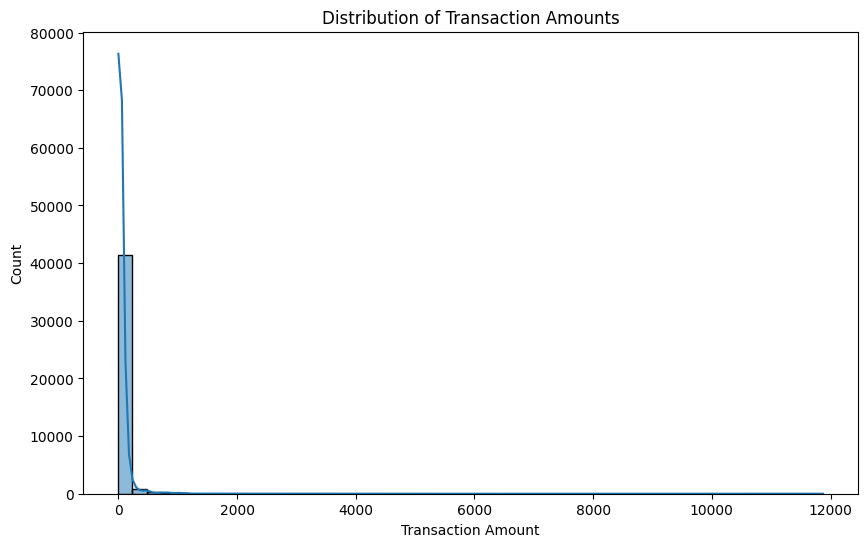

In [ ]:
# 1. Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Distribution of Transaction Amounts")
plt.show()

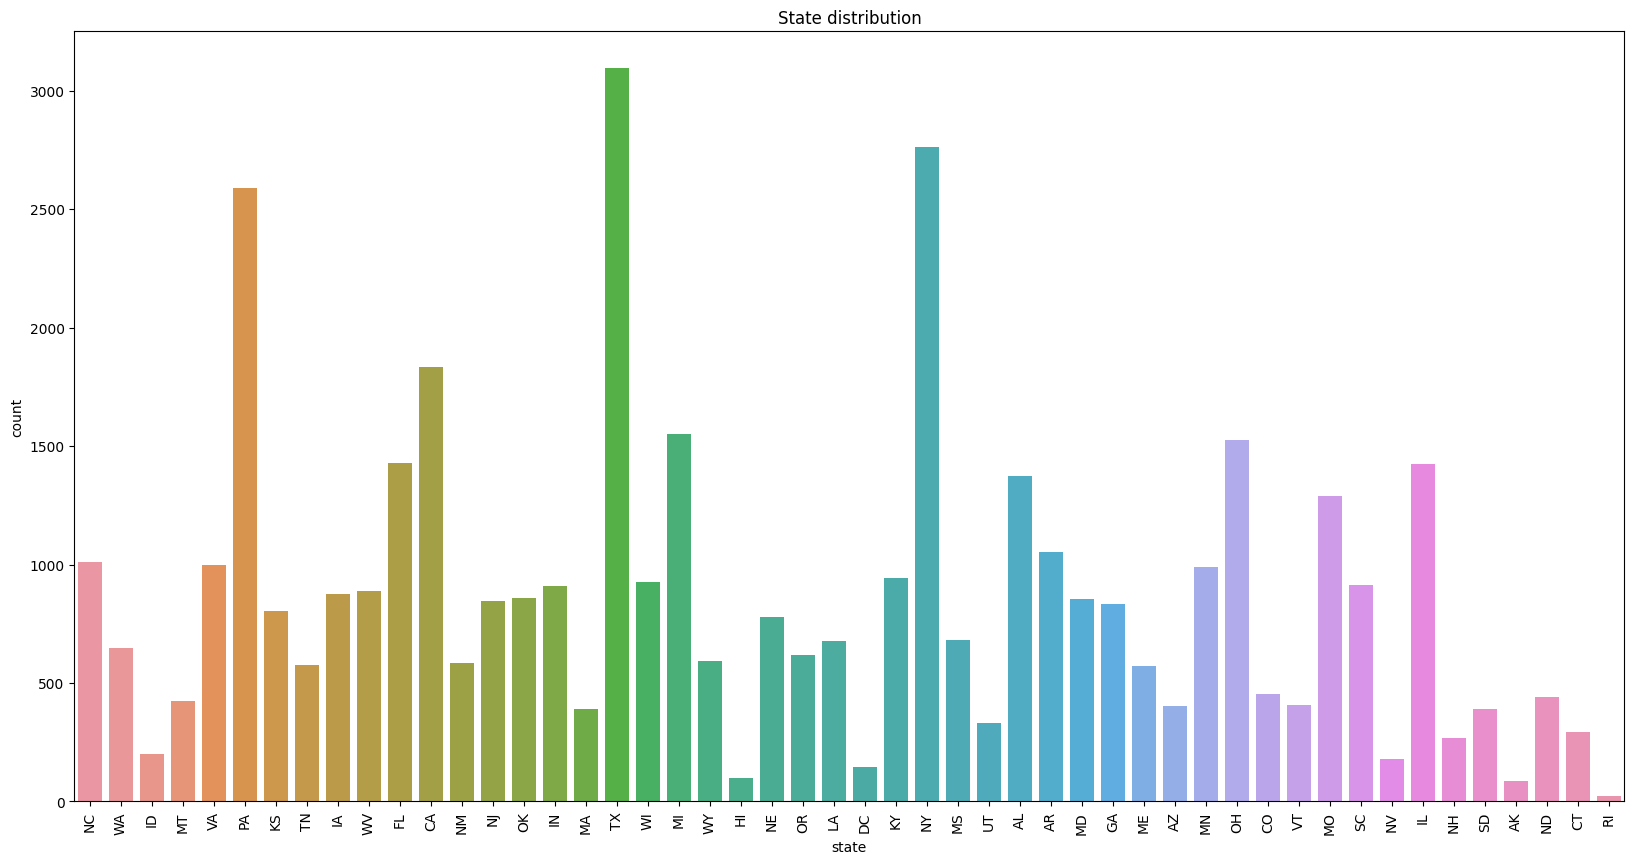

In [ ]:
# 2. Bar plot for state
plt.figure(figsize=(20, 10))
sns.countplot(x='state', data=df)
plt.title('State distribution')
plt.xticks(rotation=90)
plt.show()

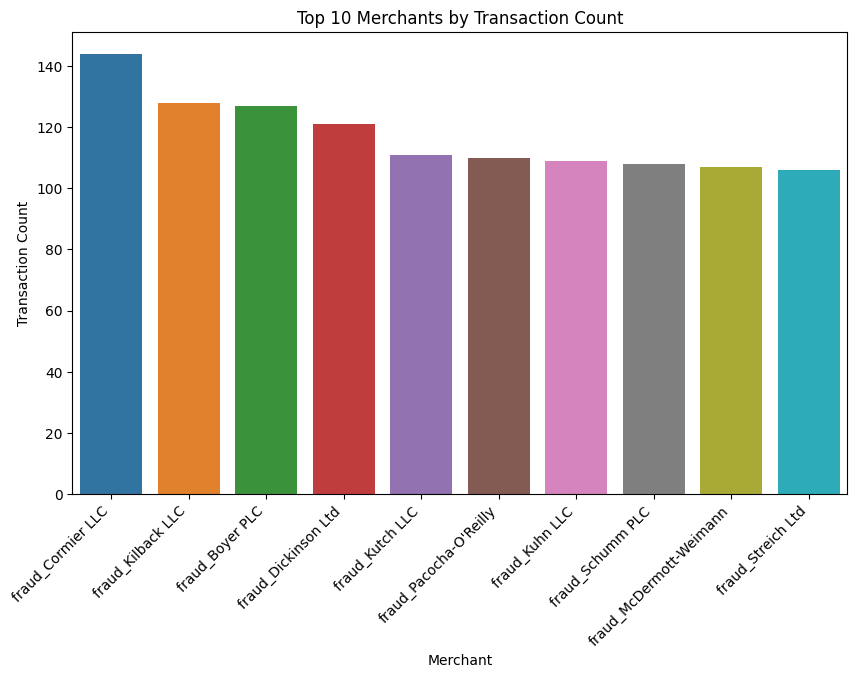

In [ ]:
# 3. Top merchants based on transaction counts
top_merchants = df['merchant'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values)
plt.xlabel("Merchant")
plt.ylabel("Transaction Count")
plt.title("Top 10 Merchants by Transaction Count")
plt.xticks(rotation=45, ha='right')
plt.show()

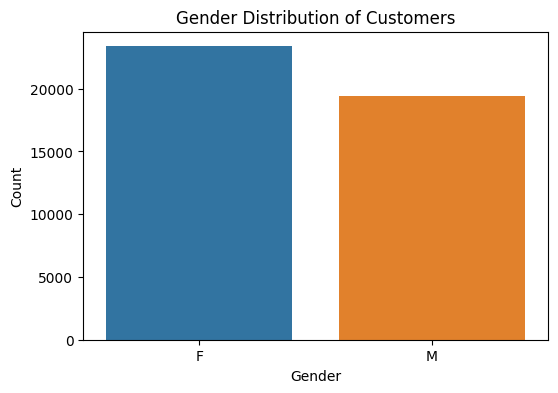

In [ ]:
# 4. Gender distribution of customers
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Customers")
plt.show()


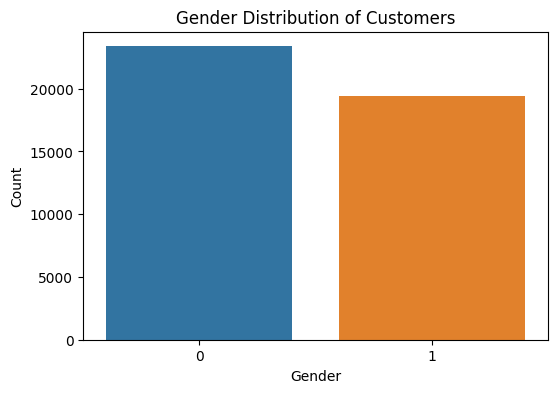

In [ ]:
# 5. Count plot for gender vs count
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=normalized_data)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution of Customers")
plt.show()


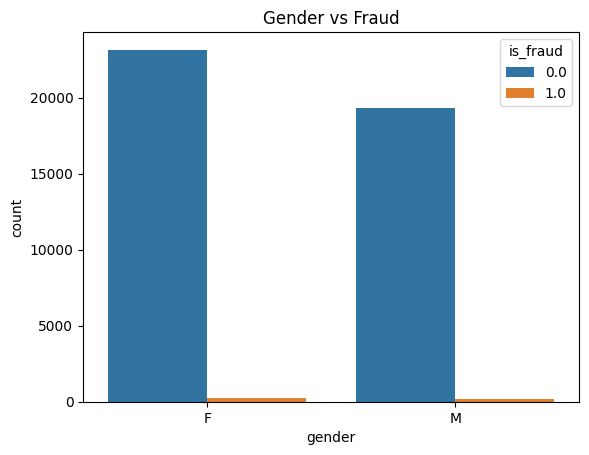

In [ ]:
# 6. Count plot for gender vs fraud
sns.countplot(x='gender', hue='is_fraud', data=df)
plt.title("Gender vs Fraud")
plt.show()


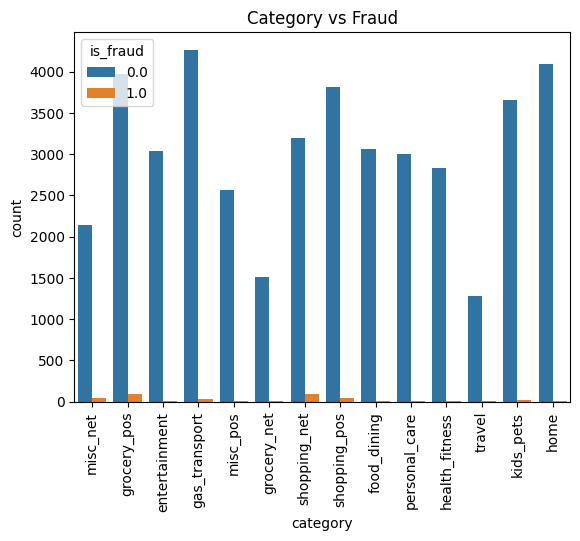

In [ ]:
# 7. Count plot for category
sns.countplot(x='category', hue='is_fraud', data=df)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

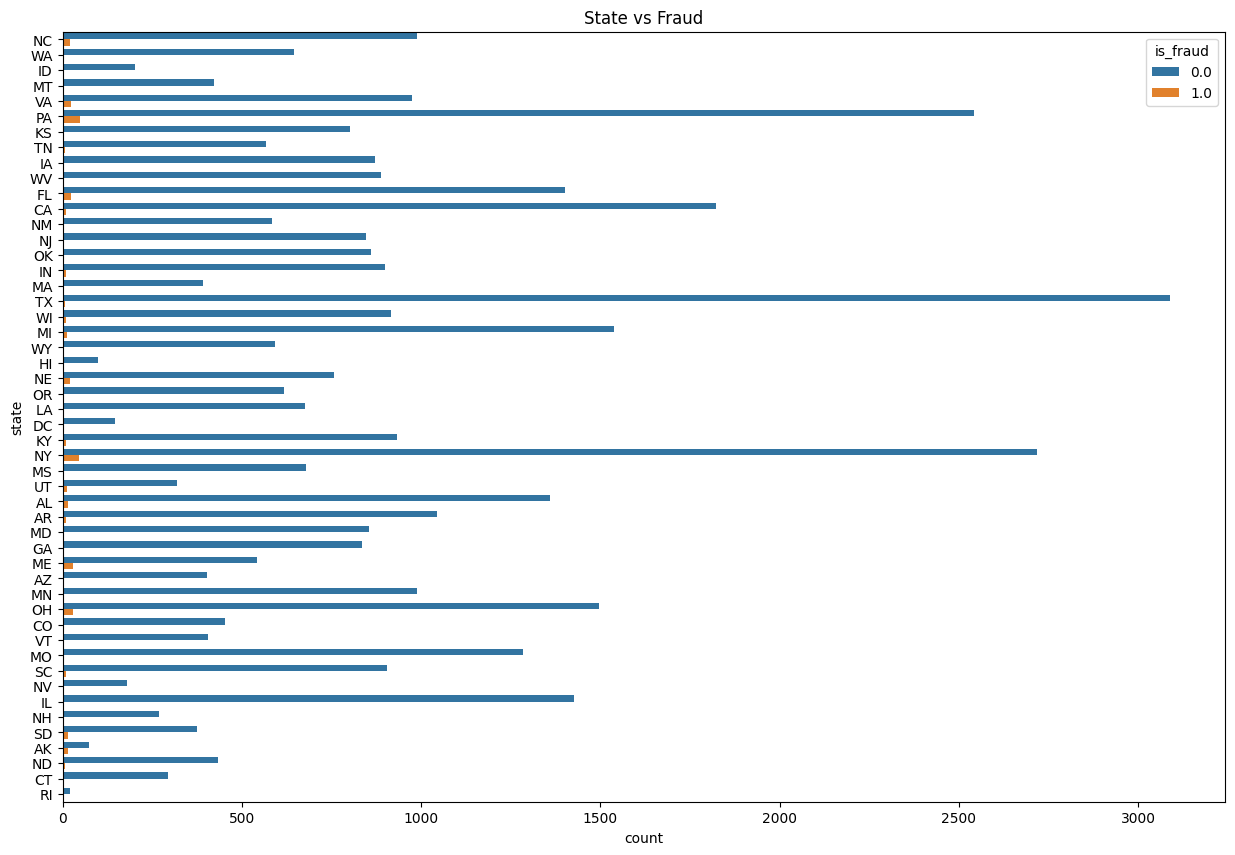

In [ ]:
# 8. State vs Fraud
plt.figure(figsize=(15,10))
sns.countplot(y='state', hue='is_fraud', data=df)
plt.title("State vs Fraud")
plt.show()

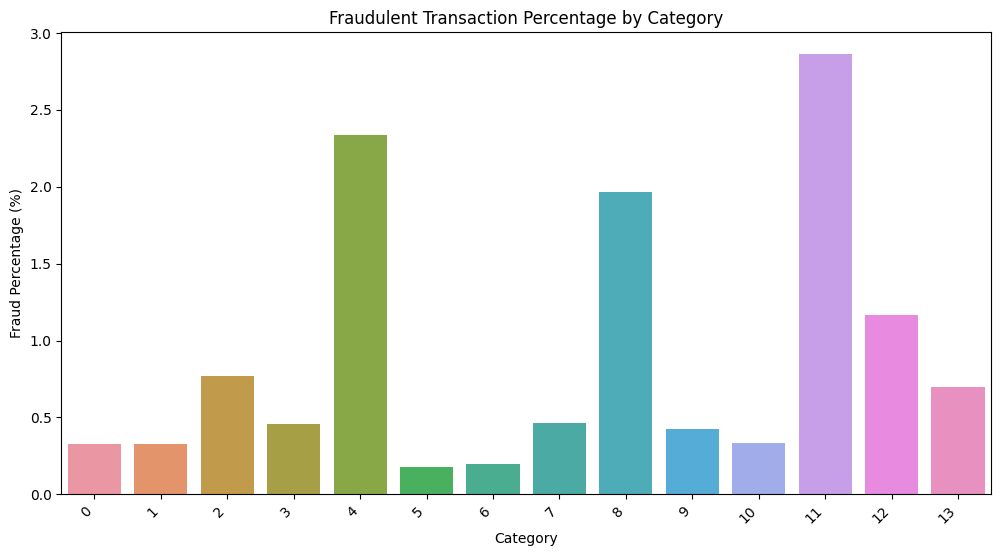

In [ ]:
# 9. Fraudulent transaction percentage by category
fraud_percentage_by_category = normalized_data.groupby('category')['is_fraud'].mean() * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_percentage_by_category.index, y=fraud_percentage_by_category.values)
plt.xlabel("Category")
plt.ylabel("Fraud Percentage (%)")
plt.title("Fraudulent Transaction Percentage by Category")
plt.xticks(rotation=45, ha='right')
plt.show()


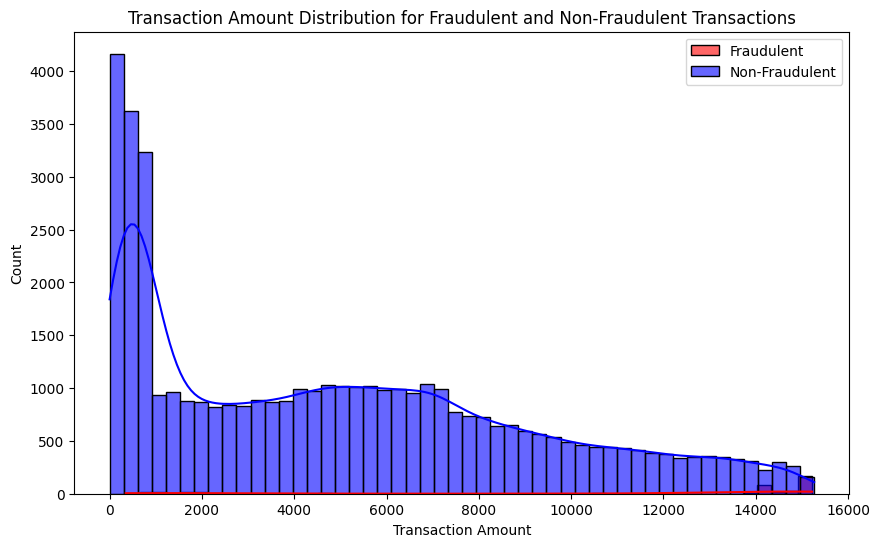

In [ ]:
# 10. Transaction amount distribution for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(normalized_data[normalized_data['is_fraud'] == 1]['amt'], bins=50, kde=True, label='Fraudulent', color='red', alpha=0.6)
sns.histplot(normalized_data[normalized_data['is_fraud'] == 0]['amt'], bins=50, kde=True, label='Non-Fraudulent', color='blue', alpha=0.6)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions")
plt.legend()
plt.show()

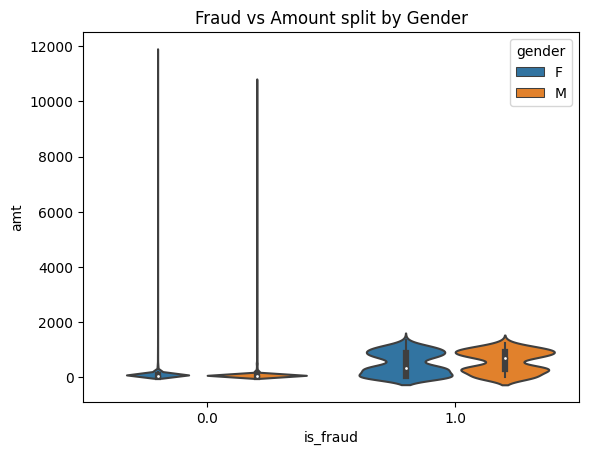

In [ ]:
# 11. Violinplot of Amount against fraud classfication split by gender.
sns.violinplot(x='is_fraud', y='amt', hue='gender', data=df)
plt.title('Fraud vs Amount split by Gender')
plt.show()

,count,distribution
legit,42433,99.07308
fraud,397,0.92692


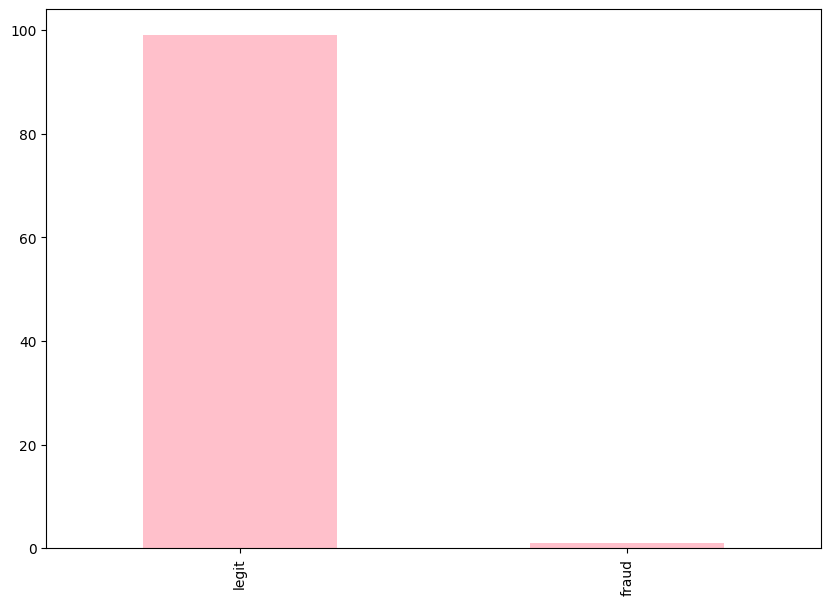

In [ ]:
a = df['is_fraud'].value_counts().rename('count') # count of classes
b = (df['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['legit','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7],color='pink');
tem

In [ ]:
a

0.0    42433
1.0      397
Name: count, dtype: int64

In [ ]:
b

0.0    99.07308
1.0     0.92692
Name: distribution, dtype: float64

In [ ]:
fraud = df[df['is_fraud']==1]
legit = df[df['is_fraud']==0]

In [ ]:
fraud.shape

(397, 22)

In [ ]:
legit.shape

(42433, 22)

In [ ]:
fraud.amt.describe()

count     397.000000
mean      526.591209
std       396.699014
min         4.500000
25%       187.350000
50%       353.060000
75%       905.280000
max      1334.070000
Name: amt, dtype: float64

In [ ]:
legit.amt.describe()

count    42433.000000
mean        67.307386
std        140.034961
min          1.000000
25%          9.620000
50%         47.630000
75%         82.740000
max      11872.210000
Name: amt, dtype: float64

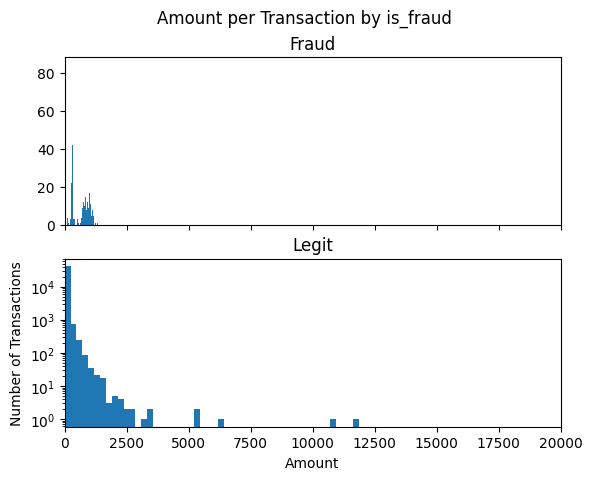

In [ ]:
df, (a1, a2) = plt.subplots(2, 1, sharex=True)
df.suptitle('Amount per Transaction by is_fraud')
bins = 50
a1.hist(fraud.amt,bins = bins)
a1.set_title('Fraud')
a2.hist(legit.amt,bins = bins)
a2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

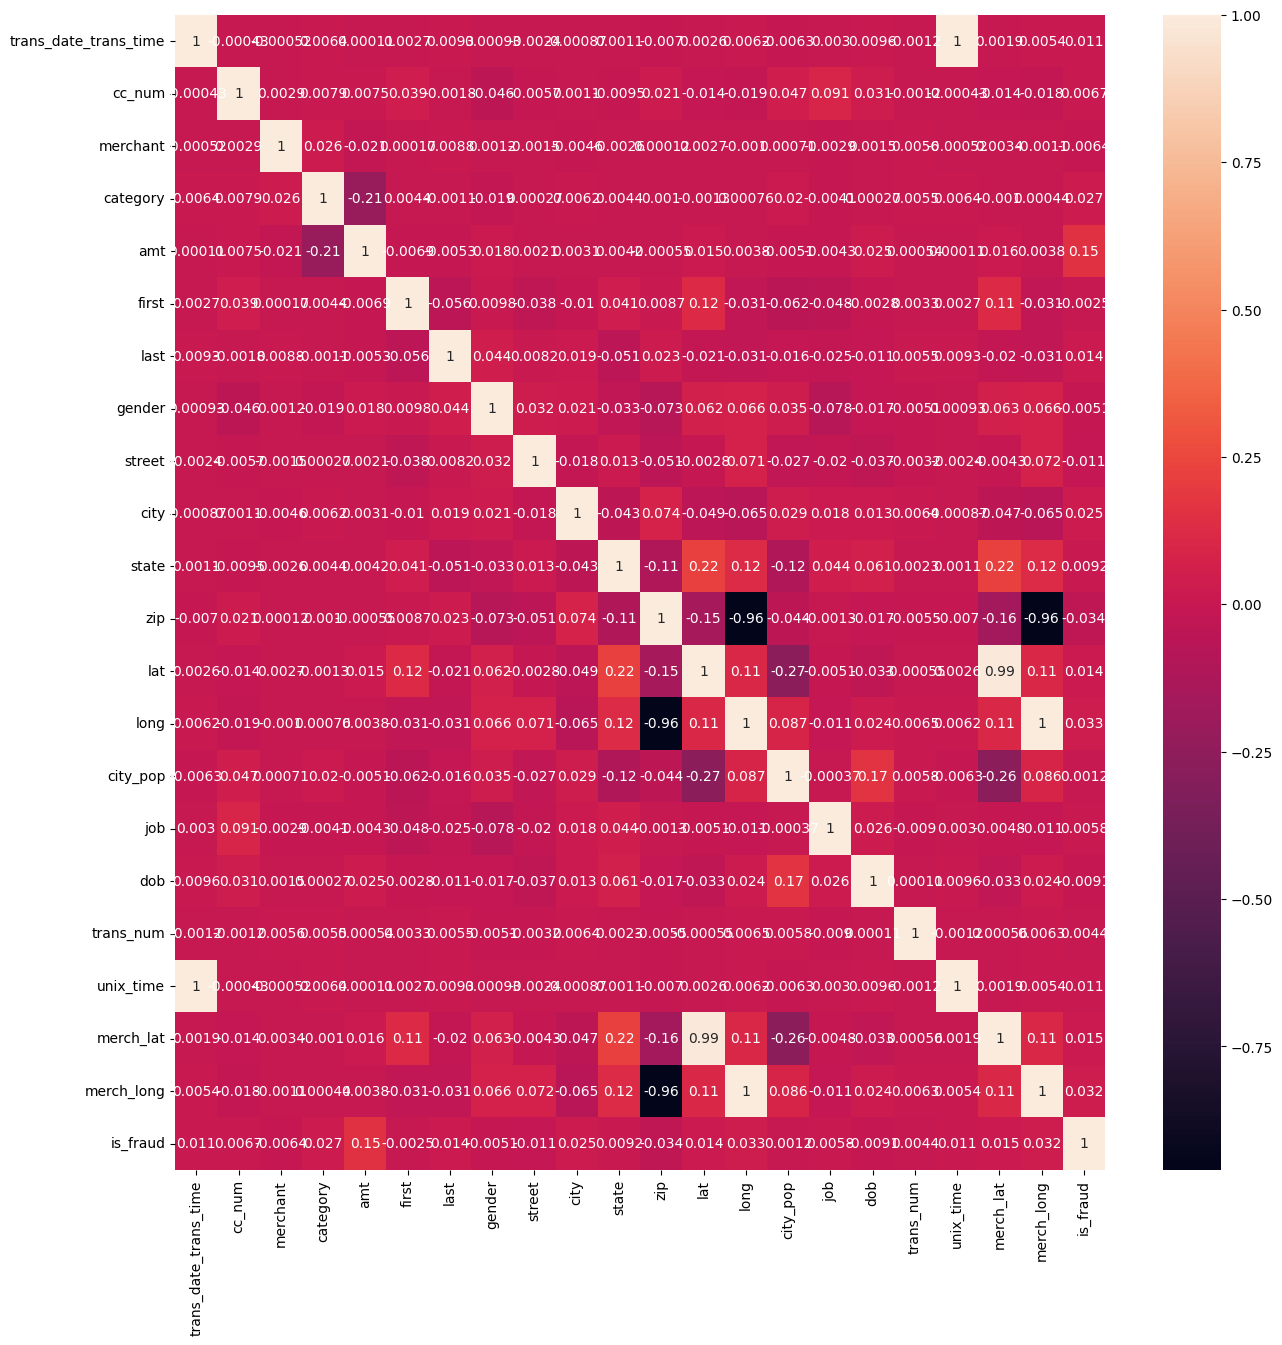

In [ ]:
#Correleation matrix
corrmat = normalized_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
graph = sns.heatmap(normalized_data[top_corr_features].corr(),annot=True)

In [ ]:
outlier_fraction = len(fraud)/float(len(legit))
print("Fraud cases: {}".format(len(fraud)))
print("Legit cases: {}".format(len(legit)))
print("Outlier fraction : {}".format(outlier_fraction))

Fraud cases: 397
Legit cases: 42433
Outlier fraction : 0.009355925812457285


**Preprocessing the FraudTest.csv for testing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
td = pd.read_csv('fraudTest.csv')

In [ ]:
td.shape

(15582, 23)

In [ ]:
td.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
td.dropna(inplace=True)

In [ ]:
td.shape

(15581, 23)

In [ ]:
td.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
td.shape

(15581, 22)

In [ ]:
td.is_fraud.nunique()

2

In [ ]:
td.is_fraud.unique()

array([0., 1.])

In [ ]:
td.is_fraud.value_counts()

0.0    15534
1.0       47
Name: is_fraud, dtype: int64

In [ ]:
label_encoder=LabelEncoder()
normalized_test=td.apply(LabelEncoder().fit_transform)
normalized_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,400,319,10,186,149,113,1,338,157,...,181,652,783,274,368,2790,0,3323,11049,0
1,1,541,591,10,2187,161,452,0,351,16,...,515,94,89,390,749,3071,1,7910,1623,0
2,2,584,611,5,2894,24,246,0,851,61,...,549,846,665,258,410,12209,2,9470,14416,0
3,3,571,222,9,4164,42,452,1,317,753,...,29,655,692,405,707,2021,3,571,11253,0
4,4,461,292,13,219,245,258,1,541,246,...,797,513,252,195,174,5351,4,14334,8553,0


In [ ]:
normalized_test.dtypes

trans_date_trans_time    int64
cc_num                   int64
merchant                 int64
category                 int64
amt                      int64
first                    int64
last                     int64
gender                   int64
street                   int64
city                     int64
state                    int64
zip                      int64
lat                      int64
long                     int64
city_pop                 int64
job                      int64
dob                      int64
trans_num                int64
unix_time                int64
merch_lat                int64
merch_long               int64
is_fraud                 int64
dtype: object

**BUILDING THE MODEL**

**MODEL USING KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#training using fraudTrain.csv
knnx_train = normalized_data.drop('is_fraud', axis=1)
knny_train= normalized_data['is_fraud']
param_grid = {
    'n_neighbors': [3, 5, 7, 9],            # You can try different values for K (number of neighbors)
    'weights': ['uniform', 'distance'],     # You can try different weight functions
    'p': [1, 2]                             # You can try different distance metrics (1: Manhattan, 2: Euclidean)
}
# Create the KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')


grid_search.fit(knnx_train,knny_train)


best_params = grid_search.best_params_


model = KNeighborsClassifier(**best_params)


model.fit(knnx_train, knny_train)


knnpred = model.predict(knnx_train)
print('Classification Report:')
print(classification_report(knny_train,knnpred))
knntrain_accuracy = accuracy_score(knny_train,knnpred)
print('Train Accuracy:', knntrain_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23170
           1       0.83      0.05      0.10       196

    accuracy                           0.99     23366
   macro avg       0.91      0.53      0.55     23366
weighted avg       0.99      0.99      0.99     23366

Train Accuracy: 0.991954121372935


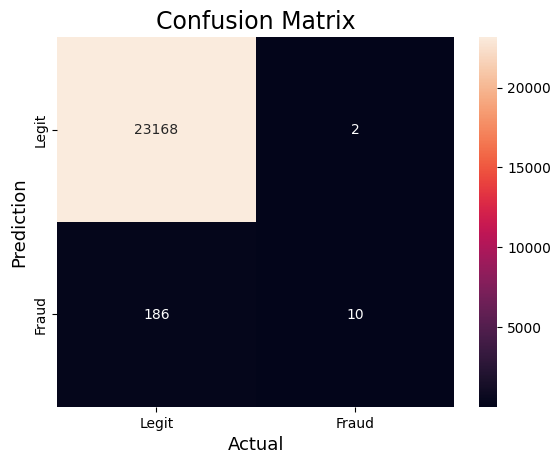

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(knny_train,knnpred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
knnx_test = normalized_test.drop('is_fraud', axis=1)
knny_test = normalized_test['is_fraud']
knntest_pred = model.predict(knnx_test)
print('Classification Report:')
print(classification_report(knny_test,knntest_pred))
knntest_accuracy = accuracy_score(knny_test,knntest_pred)
print('Test Accuracy:', knntest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34864
           1       0.04      0.01      0.01       143

    accuracy                           1.00     35007
   macro avg       0.52      0.50      0.50     35007
weighted avg       0.99      1.00      0.99     35007

Test Accuracy: 0.99517239409261


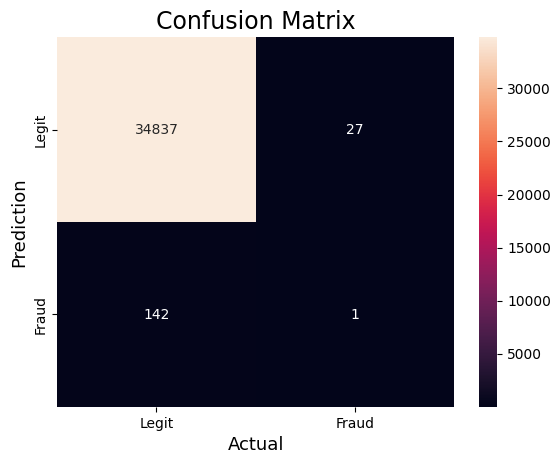

In [ ]:
cmat=metrics.confusion_matrix(knny_test,knntest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING DECISION TREE**

In [ ]:
dnX = normalized_data.drop("is_fraud", axis=1)
dny = normalized_data["is_fraud"]

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Step 4: Train a Decision Tree classifier on the entire dataset
# Step 5: Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Step 6: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(dnX, dny)

# Step 7: Print the best hyperparameters and best accuracy
print("Best Hyperparameters:")
print(grid_search.best_params_)

print("Best Accuracy on Training Data:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_

# Step 9: Make predictions on the entire dataset
dny_pred = best_classifier.predict(dnX)

# Step 10: Print the classification report
print("Classification Report:")
print(classification_report(dny, dny_pred))

Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy on Training Data: 0.8105715688803412
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23170
           1       0.99      0.87      0.92       196

    accuracy                           1.00     23366
   macro avg       0.99      0.93      0.96     23366
weighted avg       1.00      1.00      1.00     23366



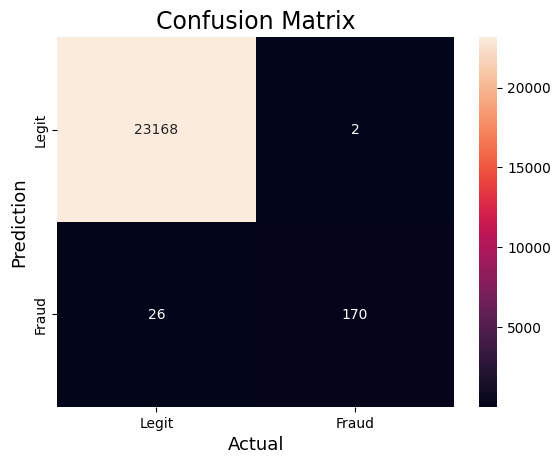

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(dny, dny_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
dnx_test = normalized_test.drop('is_fraud', axis=1)
dny_test = normalized_test['is_fraud']
dntest_pred = best_classifier.predict(dnx_test)
print('Classification Report:')
print(classification_report(dny_test,dntest_pred))
dntest_accuracy = best_classifier.score(dnx_test, dny_test)
print("Accuracy on Test Data:", dntest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     34864
           1       0.04      0.31      0.08       143

    accuracy                           0.97     35007
   macro avg       0.52      0.64      0.53     35007
weighted avg       0.99      0.97      0.98     35007

Accuracy on Test Data: 0.9696060787842431


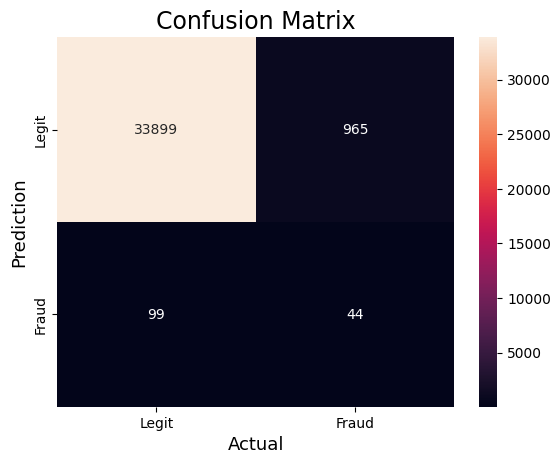

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(dny_test,dntest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

MODEL USING NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbx_train = normalized_data.drop("is_fraud", axis=1)
nby_train = normalized_data["is_fraud"]
clf = GaussianNB()
clf=clf.fit(nbx_train,nby_train)
nby_pred=clf.predict(nbx_train)
print("Classification Report:")
print(classification_report(nby_train, nby_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23170
           1       0.00      0.00      0.00       196

    accuracy                           0.99     23366
   macro avg       0.50      0.50      0.50     23366
weighted avg       0.98      0.99      0.99     23366



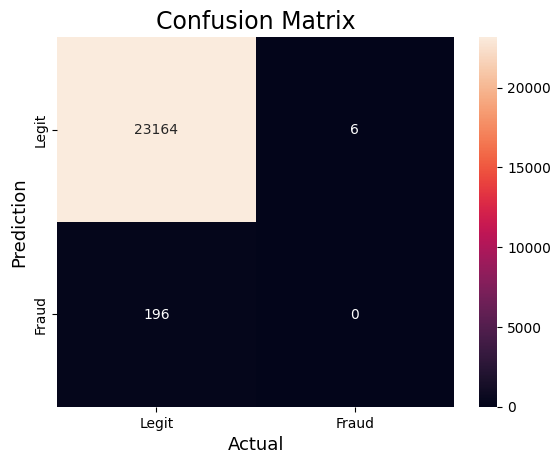

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(nby_train, nby_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#testing usind fraudTest.csv
nbx_test = normalized_test.drop('is_fraud', axis=1)
nby_test = normalized_test['is_fraud']
nbtest_pred = clf.predict(nbx_test)
print('Classification Report:')
print(classification_report(nby_test,nbtest_pred))
nbtest_accuracy = clf.score(nbx_test, nby_test)
print("Accuracy on Test Data:", nbtest_accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34864
           1       0.06      0.29      0.10       143

    accuracy                           0.98     35007
   macro avg       0.53      0.64      0.54     35007
weighted avg       0.99      0.98      0.98     35007

Accuracy on Test Data: 0.9773759533807524


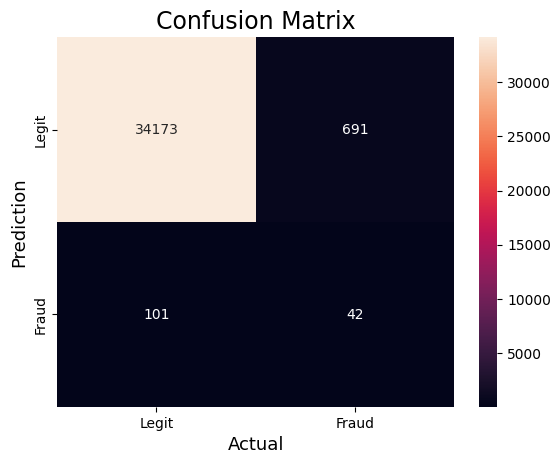

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(nby_test, nbtest_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

**MODEL USING XGBOOST**

In [ ]:
xgX = normalized_data.drop("is_fraud", axis=1)
xgy = normalized_data["is_fraud"]
xgb_classifier = xgb.XGBClassifier(random_state=40)
xgb_classifier.fit(xgX, xgy)

# Step 5: Perform cross-validation to evaluate the model
cv_accuracy = cross_val_score(xgb_classifier, xgX, xgy, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())

# Step 6: Make predictions using cross-validation
xgy_pred = xgb_classifier.predict(xgX)

# Step 7: Calculate accuracy and other metrics
xgaccuracy = accuracy_score(xgy, xgy_pred)
print("Overall Accuracy:", xgaccuracy)

print("Classification Report:")
print(classification_report(xgy, xgy_pred))

print("Confusion Matrix:")
print(confusion_matrix(xgy, xgy_pred))


Cross-Validation Accuracy: 0.9824955055952398
Overall Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23170
           1       1.00      1.00      1.00       196

    accuracy                           1.00     23366
   macro avg       1.00      1.00      1.00     23366
weighted avg       1.00      1.00      1.00     23366

Confusion Matrix:
[[23170     0]
 [    0   196]]


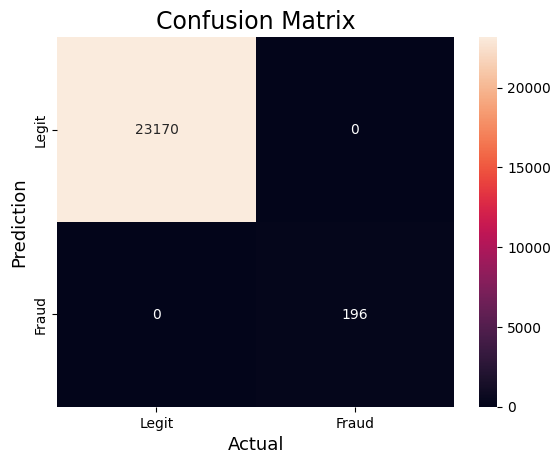

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(xgy, xgy_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
xgX_test = normalized_test.drop("is_fraud", axis=1)
xgy_test = normalized_test["is_fraud"]

# Step 4: Make predictions on the test dataset
xgy_pred = xgb_classifier.predict(xgX_test)

# Step 5: Calculate accuracy and other metrics
xgtaccuracy = accuracy_score(xgy_test, xgy_pred)
print("Accuracy on Test Data:", xgtaccuracy)

print("Classification Report:")
print(classification_report(xgy_test, xgy_pred))

print("Confusion Matrix:")
print(confusion_matrix(xgy_test, xgy_pred))

Accuracy on Test Data: 0.991173193932642
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34864
           1       0.00      0.00      0.00       143

    accuracy                           0.99     35007
   macro avg       0.50      0.50      0.50     35007
weighted avg       0.99      0.99      0.99     35007

Confusion Matrix:
[[34698   166]
 [  143     0]]


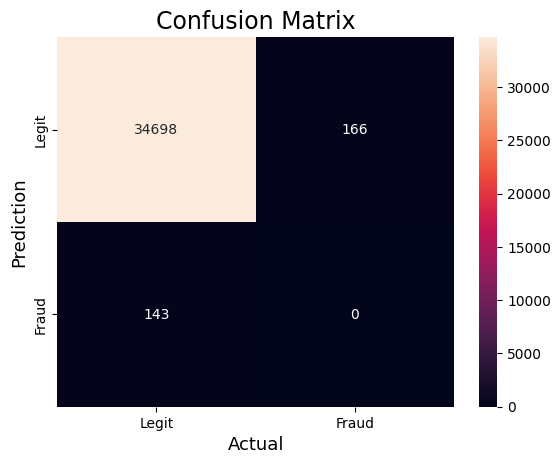

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(xgy_test, xgy_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

MODEL USING ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adX = normalized_data.drop("is_fraud", axis=1)
ady = normalized_data["is_fraud"]
adb_classifier = AdaBoostClassifier(random_state=40)
adb_classifier.fit(adX, ady)

# Step 5: Perform cross-validation to evaluate the model
adcv_accuracy = cross_val_score(adb_classifier, adX, ady, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cv_accuracy.mean())

# Step 6: Make predictions using cross-validation
ady_pred = adb_classifier.predict(adX)

# Step 7: Calculate accuracy and other metrics
adaccuracy = accuracy_score(ady, ady_pred)
print("Overall Accuracy:", adaccuracy)

print("Classification Report:")
print(classification_report(ady, ady_pred))

print("Confusion Matrix:")
print(confusion_matrix(ady, ady_pred))

Cross-Validation Accuracy: 0.9824955055952398
Overall Accuracy: 0.9974749636223573
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23170
           1       0.95      0.73      0.83       196

    accuracy                           1.00     23366
   macro avg       0.98      0.87      0.91     23366
weighted avg       1.00      1.00      1.00     23366

Confusion Matrix:
[[23163     7]
 [   52   144]]


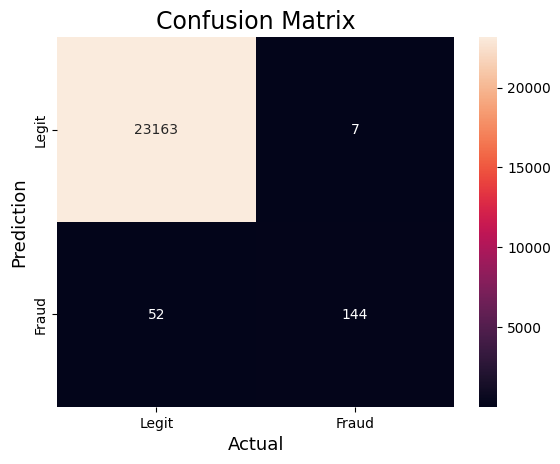

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(ady, ady_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
adX_test = normalized_test.drop("is_fraud", axis=1)
ady_test = normalized_test["is_fraud"]

# Step 4: Make predictions on the test dataset
ady_pred = adb_classifier.predict(adX_test)

# Step 5: Calculate accuracy and other metrics
adtaccuracy = accuracy_score(ady_test, ady_pred)
print("Accuracy on Test Data:", adtaccuracy)

print("Classification Report:")
print(classification_report(ady_test, ady_pred))

print("Confusion Matrix:")
print(confusion_matrix(ady_test, ady_pred))

Accuracy on Test Data: 0.9841460279372697
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     34864
           1       0.03      0.08      0.04       143

    accuracy                           0.98     35007
   macro avg       0.51      0.53      0.52     35007
weighted avg       0.99      0.98      0.99     35007

Confusion Matrix:
[[34441   423]
 [  132    11]]


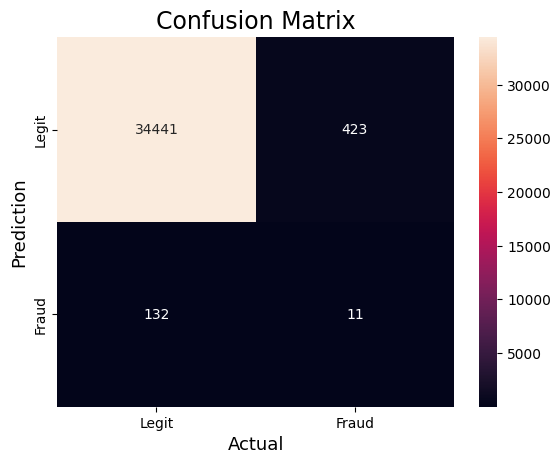

In [ ]:
from sklearn import metrics
cmat=metrics.confusion_matrix(ady_test, ady_pred)
sns.heatmap(cmat,annot=True,fmt='g',xticklabels=['Legit','Fraud'],yticklabels=['Legit','Fraud'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')